In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()


'C:\\Users\\mm13690\\Documents\\ADS\\Courses\\Udacity\\Data Science Blog\\code'

In [2]:
def clean_price(x):
    '''this function converts a price with "$","," characters  to readable float values'''
    x = str(x).replace('$','')
    x = str(x).replace(',','')
#     print(x)
    x = float(x)
    return x

def clean_perc(x):
    '''this function converts a price with "$","," characters  to readable float values'''
    x = str(x).replace('%','')
#     print(x)
    x = float(x)
    return x


### About the Data
    - Calendar Data - This file contains listing ids their availability and price on a given day
    - Listings Data - This contains full description of a listing along with its average review score
    - Reviews Data - This has data from reviews, a unique ID for each reviewer, listing_id and detailed comments
    

In [3]:
os.chdir('C:\\Users\\mm13690\\Documents\\ADS\\Courses\\Udacity\\data_science_blog\\input')
# input data
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')


In [4]:
print(df_calendar.head())
df_listings.head()

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# sample data

# Explore Listings Data

print(df_calendar.head())
print("\n Unique Listings - ",df_calendar.listing_id.nunique())
print("# Records - ",df_calendar.shape[0])

# check missing values
df_calendar.isnull().sum()  # are price values missing when a listing is not available

print("\n check #lisitngs by available \n",df_calendar.groupby(['available']).count().reset_index())

print("# of days ",df_calendar.date.nunique())


   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

 Unique Listings -  3818
# Records -  1393570

 check #lisitngs by available 
   available  listing_id    date   price
0         f      459028  459028       0
1         t      934542  934542  934542
# of days  365


 - There are 3818 unique listings, each Listing has been tracked for a total of 365 days 
 - We've the available dates for each listing and their corresponding price

In [6]:
# clean price
df_calendar['price'] = df_calendar.price.apply(clean_price)

# convert date to python readable datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['month'] = df_calendar.date.dt.month
df_calendar['year'] = df_calendar.date.dt.year
df_calendar['weekday'] = df_calendar.date.dt.weekday_name


# convert available to 1 and 0 flag
map_flag =   {'f': 0 , 't': 1}
df_calendar['available'] = df_calendar['available'].map(map_flag)

# count the total available days a listing is available and their average price
df_calendar_list_agg = df_calendar.groupby(['listing_id']).agg({'available':'sum','price':'mean'}).reset_index()

# aggregate the price and availability by date
df_calendar_date_agg = df_calendar.groupby(['date']).agg({'available':'sum','price':'mean'}).reset_index()
df_calendar_date_agg['perc_available'] = df_calendar_date_agg['available']/df_calendar.listing_id.nunique()

In [7]:
df_calendar.head()

,listing_id,date,available,price,month,year,weekday
0,241032,2016-01-04,1,85.0,1,2016,Monday
1,241032,2016-01-05,1,85.0,1,2016,Tuesday
2,241032,2016-01-06,0,NaN,1,2016,Wednesday
3,241032,2016-01-07,0,NaN,1,2016,Thursday
4,241032,2016-01-08,0,NaN,1,2016,Friday


Text(0.5, 1.0, 'Prices of Airbnbs for this year in Seattle')

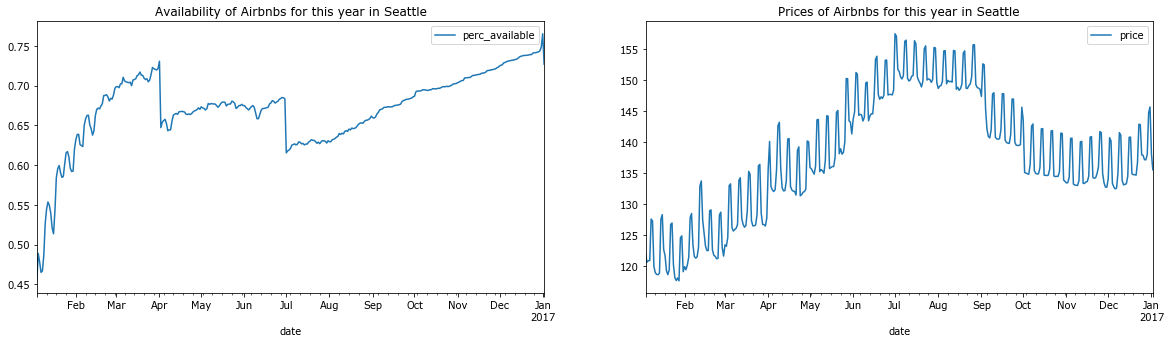

In [8]:
# Let's check if the demand of airbnb's vary with time
ax = plt.subplot(1,2,1)
df_calendar_date_agg.plot(x = 'date',y = 'perc_available',ax = ax,figsize=(20,5))
plt.title('Availability of Airbnbs for this year in Seattle')
ax = plt.subplot(1,2,2)
df_calendar_date_agg.plot(x = 'date',y = 'price',ax = ax,figsize = (20,5))
plt.title('Prices of Airbnbs for this year in Seattle')

- It looks like there is some seasonality in Seattle, specially considering how the prices of listings go up in July - August - September. A quick google search also points out that best time to visit Seattle is indeed July - September due to good weather.

- In the availability data, we do observe that there is a dip in the month of July, though too far out in the year, listings again become available and there is a steep increase in availability

- Looking at trends in prices, there seems to be some weekly trend as well, common wisdom says, listings should be a little expensive in weekends, let's explore that

Text(0.5, 1.0, 'Weekly fluctuation in prices of Airbnbs in Seattle')

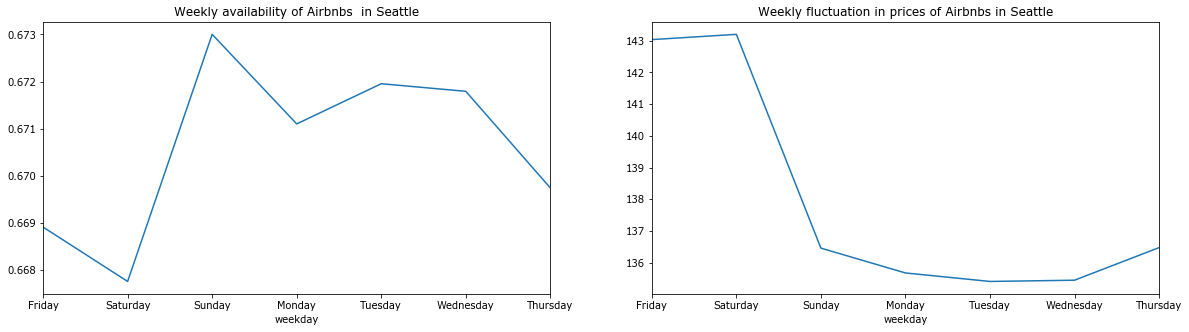

In [9]:
#aggregate availability and price by day of the week
df_calendar_day_agg = df_calendar.groupby(['weekday']).agg({'available':[('available_listings','sum'),('total_listings','count')],'price':'mean'}).reset_index()
df_calendar_day_agg.columns = ['weekday','available_listings','total_listings','price']
df_calendar_day_agg['perc_available'] = df_calendar_day_agg['available_listings']/df_calendar_day_agg['total_listings']
df_calendar_day_agg = df_calendar_day_agg.set_index('weekday')
df_calendar_day_agg = df_calendar_day_agg.reindex(['Friday', 'Saturday', 'Sunday',  'Monday','Tuesday', 'Wednesday','Thursday'])
df_calendar_day_agg
ax = plt.subplot(1,2,1)
df_calendar_day_agg['perc_available'].plot(ax = ax,figsize=(20,5))
plt.title('Weekly availability of Airbnbs  in Seattle')
ax = plt.subplot(1,2,2)
df_calendar_day_agg['price'].plot(ax = ax,figsize = (20,5))
plt.title('Weekly fluctuation in prices of Airbnbs in Seattle')

 - We can see that availability falls and price increases on weekends across Airbnbs listings in Seattle

In [10]:
# Let's explore how prices and availability vary by type of listings

#merge calendar data with listings
df_calendar_list_agg = df_calendar_list_agg.merge(df_listings[['id','property_type','room_type']],left_on='listing_id',
                                                 right_on='id',how='left')

# remove listings with missing values
df_calendar_list_agg.dropna(axis = 0,inplace = True)
df_calendar_list_agg.isna().sum()

df_calendar_list_agg.head()
df_calendar_list_agg['perc_available'] = df_calendar_list_agg['available']/365.0

df_calendar_ppty_agg = df_calendar_list_agg.groupby(['property_type']).agg({'perc_available':[('perc_available','mean'),('std_available','std')],   \
                                                                            'price':[('price','mean'),('std_price','std')],'listing_id':'count',    \
                                                                           }).reset_index()

df_calendar_ppty_agg.columns = ['property_type','perc_available','std_available','price','std_price','count']

df_calendar_room_agg = df_calendar_list_agg.groupby(['room_type']).agg({'perc_available':[('perc_available','mean'),('std_available','std')],
                                                                        'price':[('price','mean'),('std_price','std')],'listing_id':'count'      \
                                                                           }).reset_index()
df_calendar_room_agg.columns = ['room_type','perc_available','std_available','price','std_price','count']


Text(0.5, 1.0, 'Variation in price by type of property')

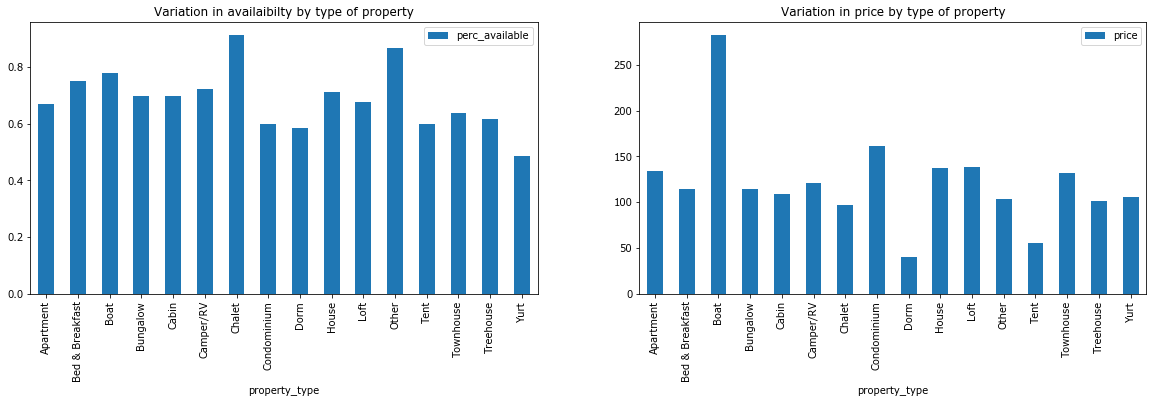

In [11]:
# Let's have a look at availaibilty and prices and property type
ax = plt.subplot(1,2,1)
df_calendar_ppty_agg.plot.bar(x = 'property_type',y = 'perc_available',ax = ax, figsize = (20,5))
plt.title('Variation in availaibilty by type of property')

ax = plt.subplot(1,2,2)
df_calendar_ppty_agg.plot.bar(x = 'property_type',y = 'price',ax = ax, figsize = (20,5))
plt.title('Variation in price by type of property')

 - Looks like boats are expensive to rent and Dorms are the cheapest (no surprises)

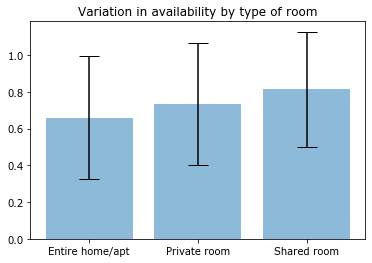

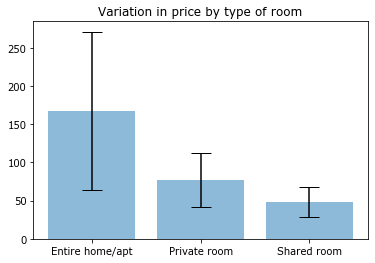

In [12]:
def error_bar(df,x,y,err,title):
    '''A function to create a bar plots with standard deviation'''
    x_label = df[x].tolist()
    x_pos = np.arange(len(x_label))
    y_val = df[y].tolist()
    error = df[err].tolist()

    #Build the Plot
    fig,ax = plt.subplots()
    ax.bar(x_pos,y_val,yerr = error,align = 'center',alpha = 0.5,ecolor = 'black',capsize = 10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_label)
    ax.set_title(title)


error_bar(df_calendar_room_agg,x = 'room_type',y = 'perc_available',err = 'std_available',
          title = 'Variation in availability by type of room')
error_bar(df_calendar_room_agg,x = 'room_type',y = 'price',err = 'std_price',
          title = 'Variation in price by type of room')

 - Though there does not appear to be a noticable difference between the availaibility of differenty types of room available across different listings of Airbnbs in Seattle, the difference in prices is evident.Entire home/apartment is expensive than a private room followed by shared room

 - Additionally, there is a large standard deviation around the prices of Entire home/apartment, this probably is due to differences within the Homes/Apartments in terms of amenities offered, locality, experiences, # rooms, # beds etc.
 
Therefore while you wouldn't get too much choice price wise while going for a shared or a private rooom in an Airbnb, there is a lot of different choices available by price when it comes to renting out entire homes 


However this is not very informative, as we are not controlling for property type when we compare room types across Airbnbs

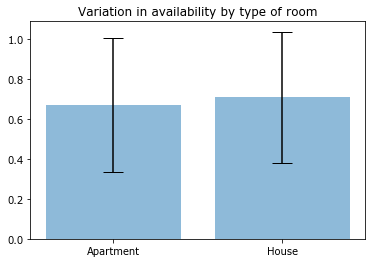

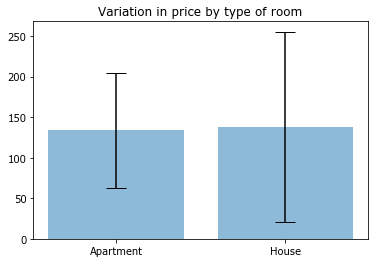

In [13]:
# Out of total Entire House/Apartment Listings, 90% are Apartments or House while rest 13 categories sum up to ~10%
# Since we don't have enough data points for these, I'll drop them and focus on property type either Apartment or a House
df_calendar_ppty_agg = df_calendar_ppty_agg[df_calendar_ppty_agg.property_type.isin(['Apartment','House'])]
df_calendar_ppty_agg
error_bar(df_calendar_ppty_agg,x = 'property_type',y = 'perc_available',err = 'std_available',
          title = 'Variation in availability by type of room')
error_bar(df_calendar_ppty_agg,x = 'property_type',y = 'price',err = 'std_price',
          title = 'Variation in price by type of room')


Average price for an Apartment and House is similar, though there seems to be a slightly higher variation between listings of Houses Airbnbs compared to Apartments

In [ ]:
# Let's analyze how different set of features impact price of a listing, and develop a model which could help us predict(or set)
# the price of a listing based on a bunch of different attributes - host related, property related, type of reviews etc.

In [141]:
# square feet is missing in over 95% listings, therfore dropped from the analysis
df_flt_listings = df_listings[['id','host_since','host_response_time','host_acceptance_rate','host_is_superhost','host_listings_count',
            'host_total_listings_count','host_identity_verified',
            'neighbourhood_group_cleansed','property_type','room_type','accommodates','bathrooms',
            'bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee',
            'guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated',
            'availability_30','availability_60','availability_90','availability_365',
            'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication','review_scores_location','review_scores_value',
            'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification',
             'calculated_host_listings_count','reviews_per_month']]

# filter for Property Type as House
df_flt_listings = df_flt_listings[df_flt_listings.property_type == 'House']

In [142]:
### clean price and percentage values to proper numbers - understandable to a model
df_flt_listings['price'] = df_flt_listings.price.apply(clean_price)
df_flt_listings['cleaning_fee'] = df_flt_listings.cleaning_fee.apply(clean_price)
df_flt_listings['extra_people'] = df_flt_listings.extra_people.apply(clean_price)
df_flt_listings['security_deposit'] = df_flt_listings.security_deposit.apply(clean_price)
df_flt_listings['host_acceptance_rate'] = df_flt_listings.host_acceptance_rate.apply(clean_perc)


In [143]:
# convert categorical variables to numeric

map_calendar_updated =   {'4 weeks ago':28, 'today':0, '5 weeks ago':35, '6 months ago':180,
       '7 weeks ago':49, '2 weeks ago':14, 'yesterday':1, '5 months ago':150,
       'a week ago':7, '5 days ago':5, '3 days ago':3, '2 months ago':60,
       '3 months ago':90, '4 days ago':4, '2 days ago':2, '3 weeks ago':21,
       '1 week ago':7, '13 months ago':390, '6 weeks ago':42, '8 months ago':56,
       '12 months ago':360, '4 months ago':120, 'never':1000, '6 days ago':6,
       '10 months ago':300, '14 months ago':420, '9 months ago':270, '7 months ago':210,
       '30 months ago':900, '11 months ago':330, '22 months ago':660, '16 months ago':480,
       '15 months ago':450, '17 months ago':510}

df_flt_listings['calendar_updated'] = df_flt_listings.calendar_updated.map(map_calendar_updated)

# map true/false labels to 1/0
map_flag =   {'f': 0 , 't': 1}
df_flt_listings['instant_bookable'] = df_flt_listings.instant_bookable.map(map_flag)
df_flt_listings['host_is_superhost'] = df_flt_listings.host_is_superhost.map(map_flag)
df_flt_listings['require_guest_profile_picture'] = df_flt_listings.require_guest_profile_picture.map(map_flag)
df_flt_listings['require_guest_phone_verification'] = df_flt_listings.require_guest_phone_verification.map(map_flag)
df_flt_listings['host_identity_verified'] = df_flt_listings.host_identity_verified.map(map_flag)


In [144]:
# One Hot Encoding of categorical variables
df_dummy_temp = pd.get_dummies(df_flt_listings[['id','room_type','cancellation_policy','neighbourhood_group_cleansed',
                                               'host_response_time']], drop_first = True)
df_flt_listings = df_flt_listings.merge(df_dummy_temp,on = 'id', how = 'left')
df_flt_listings.drop(['property_type','room_type','bed_type','cancellation_policy','neighbourhood_group_cleansed',
                     'host_response_time'],axis =1,inplace = True)



In [145]:
df_flt_listings.isnull().sum()/df_flt_listings.shape[0]

id                                                  0.000000
host_since                                          0.000000
host_acceptance_rate                                0.208886
host_is_superhost                                   0.000000
host_listings_count                                 0.000000
host_total_listings_count                           0.000000
host_identity_verified                              0.000000
accommodates                                        0.000000
bathrooms                                           0.005193
bedrooms                                            0.000577
beds                                                0.000577
amenities                                           0.000000
price                                               0.000000
security_deposit                                    0.490479
cleaning_fee                                        0.270052
guests_included                                     0.000000
extra_people            

In [146]:
# impute missing values

# looks like new listings or inactive listings don't have any reviews, impute them with zero

#let's assume, missing acceptance rate likely suggests zero acceptance
df_flt_listings['host_acceptance_rate'].fillna(0,inplace = True)

# impute mising deposits with mean
df_flt_listings['security_deposit'].fillna(df_flt_listings.security_deposit.mean(),inplace = True)
df_flt_listings['cleaning_fee'].fillna(df_flt_listings.cleaning_fee.mean(),inplace = True)

df_flt_listings['review_scores_rating'].fillna(df_flt_listings.review_scores_rating.mean(),inplace = True)
df_flt_listings['review_scores_accuracy'].fillna(df_flt_listings.review_scores_accuracy.mean(),inplace = True)
df_flt_listings['review_scores_cleanliness'].fillna(df_flt_listings.review_scores_cleanliness.mean(),inplace = True)
df_flt_listings['review_scores_checkin'].fillna(df_flt_listings.review_scores_checkin.mean(),inplace = True)
df_flt_listings['review_scores_communication'].fillna(df_flt_listings.review_scores_communication.mean(),inplace = True)
df_flt_listings['review_scores_location'].fillna(df_flt_listings.review_scores_location.mean(),inplace = True)
df_flt_listings['review_scores_value'].fillna(df_flt_listings.review_scores_value.mean(),inplace = True)
df_flt_listings['reviews_per_month'].fillna(df_flt_listings.reviews_per_month.mean(),inplace = True)
df_flt_listings['bathrooms'].fillna(df_flt_listings.bathrooms.mean(),inplace = True)
df_flt_listings['bedrooms'].fillna(df_flt_listings.bedrooms.mean(),inplace = True)
df_flt_listings['beds'].fillna(df_flt_listings.beds.mean(),inplace = True)


In [147]:
# convert amenities into categories
_list_amenities = []

for index,row in df_flt_listings.iterrows():
    _list_amenities.extend((row['amenities'][1:(len(row['amenities'])-1)].split(',')))

df_temp = df_flt_listings[['id','amenities']]
amenities = list(set(_list_amenities))[1:]
for i in amenities:
    df_temp[i] = 0

for i in amenities:
    df_temp[i] = df_temp['amenities'].apply(lambda x: 1 if i in x else 0)

df_temp.drop(['amenities'],axis = 1,inplace = True)
df_flt_listings.drop(['amenities'],axis = 1,inplace = True)

df_flt_listings = df_flt_listings.merge(df_temp, on = 'id',how = 'left')

C:\Users\mm13690\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mm13690\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\mm13690\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [148]:
# convert date into meaningful features - in this case, we believe that older hosts might have some advantage over newer hosts
df_flt_listings['host_since'] = pd.to_datetime(df_flt_listings['host_since'])
df_flt_listings['host_since']  = (df_calendar.date.max() - df_flt_listings.host_since)
df_flt_listings['host_since'] = df_flt_listings.host_since.dt.days
# df_calendar['month'] = df_calendar.date.dt.month
# df_calendar['year'] = df_calendar.date.dt.year
# df_calendar['weekday'] = df_calendar.date.dt.weekday_name

In [149]:
# missing vlaues
df_flt_listings.isnull().sum().sum()

0

In [150]:
# Remove extremely correlated variables from the analysis

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_flt_listings)
vif_dat = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index = X.columns)

vif_dat.sort_values(ascending=False)

C:\Users\mm13690\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mm13690\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


host_listings_count                             inf
host_total_listings_count                       inf
const                                    941.933703
availability_60                           50.976930
availability_90                           29.710246
                                            ...    
neighbourhood_group_cleansed_Cascade       1.113237
"Wheelchair Accessible"                    1.112322
"Air Conditioning"                         1.089531
neighbourhood_group_cleansed_Interbay      1.066383
"Washer / Dryer"                           1.040900
Length: 99, dtype: float64

In [151]:
df_flt_listings.drop(['host_total_listings_count','availability_60','availability_90','availability_30'],axis = 1, inplace = True)

In [152]:
# Re calculate VIF
X = add_constant(df_flt_listings)
vif_dat = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index = X.columns)
vif_dat.sort_values(ascending=False)

const                                    939.127254
accommodates                               8.698680
beds                                       6.146637
bedrooms                                   6.110941
Dryer                                      5.396367
                                            ...    
neighbourhood_group_cleansed_Cascade       1.111695
"Wheelchair Accessible"                    1.105682
"Air Conditioning"                         1.084059
neighbourhood_group_cleansed_Interbay      1.061872
"Washer / Dryer"                           1.040620
Length: 95, dtype: float64

In [153]:
df_flt_listings.drop(['id','accommodates','beds','Dryer','Internet','Hangers','host_response_time_within an hour'],axis = 1, inplace = True)

In [154]:
# Re calculate VIF
X = add_constant(df_flt_listings)
vif_dat = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index = X.columns)
vif_dat.sort_values(ascending=False)

const                                    912.786318
require_guest_phone_verification           4.525920
require_guest_profile_picture              4.348866
"Pets live on this property"               4.285521
bedrooms                                   4.008755
                                            ...    
neighbourhood_group_cleansed_Cascade       1.108267
"Wheelchair Accessible"                    1.098611
"Air Conditioning"                         1.083300
neighbourhood_group_cleansed_Interbay      1.056335
"Washer / Dryer"                           1.039570
Length: 88, dtype: float64

In [155]:
import numpy as np
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

%matplotlib inline

X = df_flt_listings.drop(['price'],axis = 1)
y = df_flt_listings.price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)


lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

print('Training Score: {}'.format(lr_model.score(X_train,y_train)))
print('Test Score: {}'.format(lr_model.score(X_test,y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training Score: 0.7104260563921856
Test Score: 0.7062937599858568
RMSE: 51.78466936580307


In [156]:
X_test.head()

,host_since,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,bathrooms,bedrooms,security_deposit,cleaning_fee,guests_included,...,"""Indoor Fireplace""","""Buzzer/Wireless Intercom""","""Washer / Dryer""","""Suitable for Events""",Pool,"""Smoking Allowed""",Essentials,"""Family/Kid Friendly""",Iron,"""Laptop Friendly Workspace"""
385,703,100.0,0,21.0,0,2.0,1.0,500.000000,10.000000,1,...,0,0,0,0,0,0,1,1,1,1
1659,1041,0.0,0,1.0,1,1.0,1.0,250.000000,12.000000,1,...,1,0,0,0,0,0,1,0,0,0
879,1158,100.0,0,1.0,0,2.5,1.0,300.000000,120.000000,1,...,1,0,0,0,0,0,1,0,0,0
152,906,100.0,1,1.0,1,2.0,3.0,100.000000,66.464822,5,...,1,0,0,0,0,0,1,1,0,0
24,586,100.0,0,1.0,1,1.0,1.0,319.217441,66.464822,1,...,0,0,0,0,0,0,1,1,0,0


In [159]:
# print(X_test.loc[1326])
# predict price from test set 
lr_model.predict(np.array(X_test.loc[385]).reshape(1,86))


array([48.59690369])